In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


In [2]:
news_data=pd.read_csv('NewspaperData.csv')
news_data.head(5)

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093


In [3]:
news_data.shape

(34, 3)

In [4]:
news_data.describe()

,daily,sunday
count,34.000000,34.000000
mean,430.962471,591.202412
std,269.211470,376.418051
min,133.239000,202.614000
25%,233.021500,327.769500
50%,355.235500,436.712500
75%,516.616500,699.735250
max,1209.225000,1762.015000


In [5]:
news_data.isnull().sum()

Newspaper    0
daily        0
sunday       0
dtype: int64

In [6]:
news_data.dtypes

Newspaper     object
daily        float64
sunday       float64
dtype: object

### hypothesis 
ho:sunday sell is not related to daily sell

ha: sunday sell is related to daily sell

### assumption test
linearity test

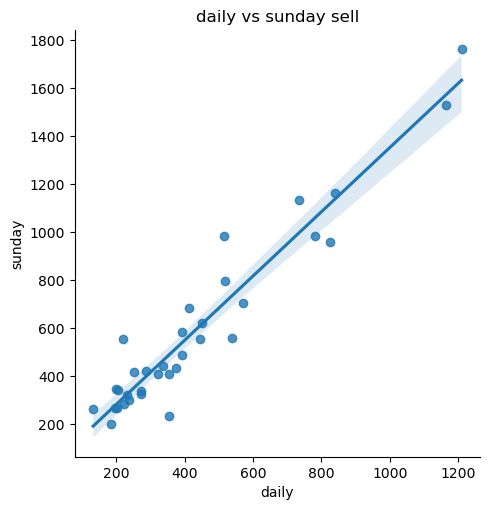

In [7]:
sns.lmplot(x='daily', y='sunday',data=news_data)
plt.title("daily vs sunday sell")
plt.show()

### normality test

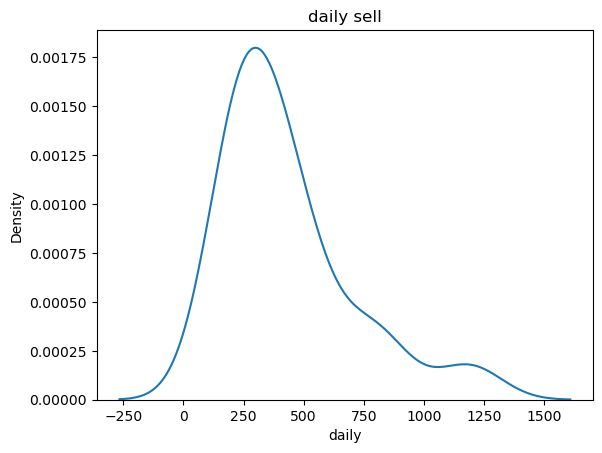

In [8]:
sns.distplot(a=news_data['daily'],hist=False)
plt.title("daily sell")
plt.show()

In [9]:
news_data['daily'].skew()

1.5321591323040094

news_data[.kurtosis()

### here near about normal bell shaped curve  we get then depending upon the value of skewness(should be<3) and kurtosis(should be<3) pass normality test

### model building

In [10]:
news_data1=news_data.drop(labels='Newspaper',axis=1)
news_data1

,daily,sunday
0,391.952,488.506
1,516.981,798.298
2,355.628,235.084
3,238.555,299.451
4,537.780,559.093
5,733.775,1133.249
6,198.832,348.744
7,252.624,417.779
8,206.204,344.522
9,231.177,323.084


### model building

In [11]:
import statsmodels.formula.api as smf

In [12]:
linear_model=smf.ols(formula='sunday~daily',data=news_data1)

### model training

In [13]:
linear_model=linear_model.fit()

In [14]:
linear_model.params

Intercept    13.835630
daily         1.339715
dtype: float64

In [15]:
print(linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 sunday   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     358.5
Date:                Sat, 28 Oct 2023   Prob (F-statistic):           6.02e-19
Time:                        06:19:03   Log-Likelihood:                -206.85
No. Observations:                  34   AIC:                             417.7
Df Residuals:                      32   BIC:                             420.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.8356     35.804      0.386      0.7

### model testing

In [16]:
x_test=pd.DataFrame( data={'daily':[300,250,585]})
x_test

,daily
0,300
1,250
2,585


### manual testing

In [17]:
# for x=300
#y=13.8356+(1.3397*300)->415.74
#y=13.8356+(1.3397*250)->348.76
#y=13.8356+(1.3397*585)->797.56
print(y)

NameError: name 'y' is not defined

### automatic calculation

In [ ]:
linear_model.predict(x_test)

In [18]:
from pickle import dump
dump(linear_model,open('linear_intelligence.pkl','wb'))

In [19]:
from pickle import load
loaded_lin_model = load(open('linear_intelligence.pkl','rb'))

In [20]:
loaded_lin_model.predict(x_test)

0    415.750057
1    348.764319
2    797.568763
dtype: float64